## draw trees

In [2]:
source('drawtrees.R')    

In [10]:
setwd('/storage/catherine')
meta <- read.table('metadata.csv',sep=',',
                      header=TRUE,row.names=1)
tree <- read.tree('results/tree.newick')

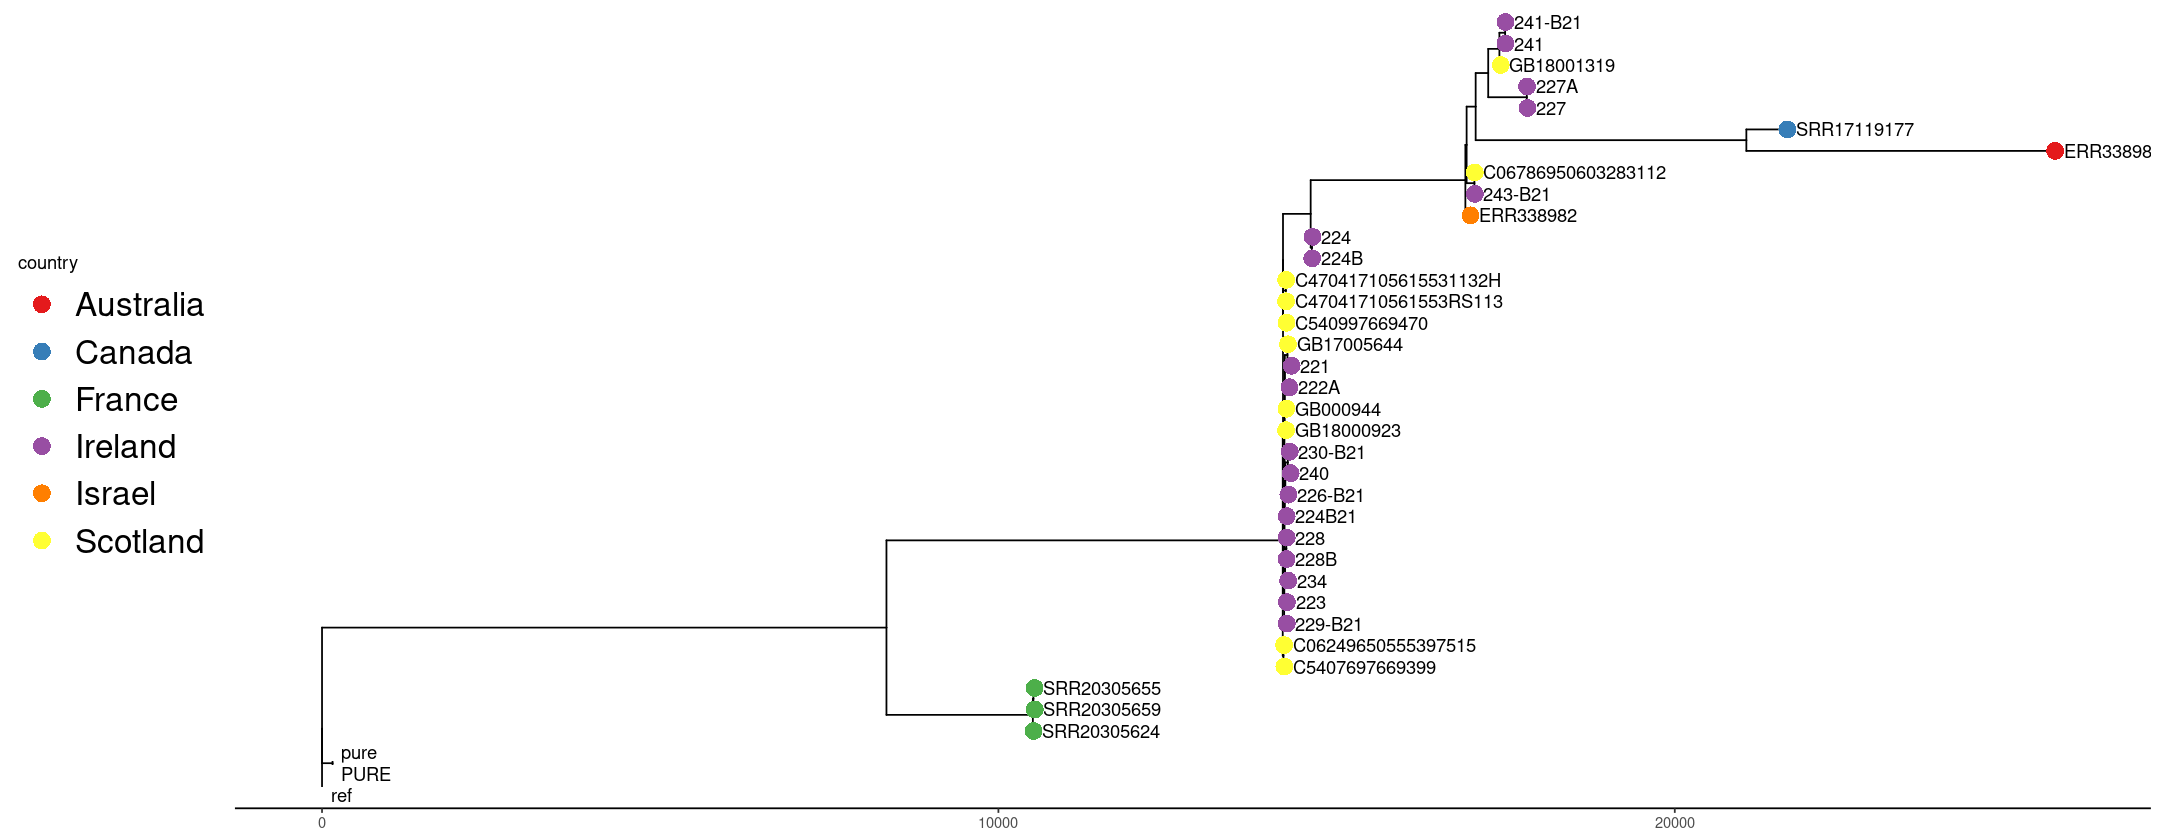

In [11]:
options(repr.plot.width=18, repr.plot.height=7) 
stree <- root(tree,'ref')
ggplottree(stree, meta, layout='rect', cols=c('country'), cmaps=c('Set1'),tipsize=5, tiplabel=TRUE)

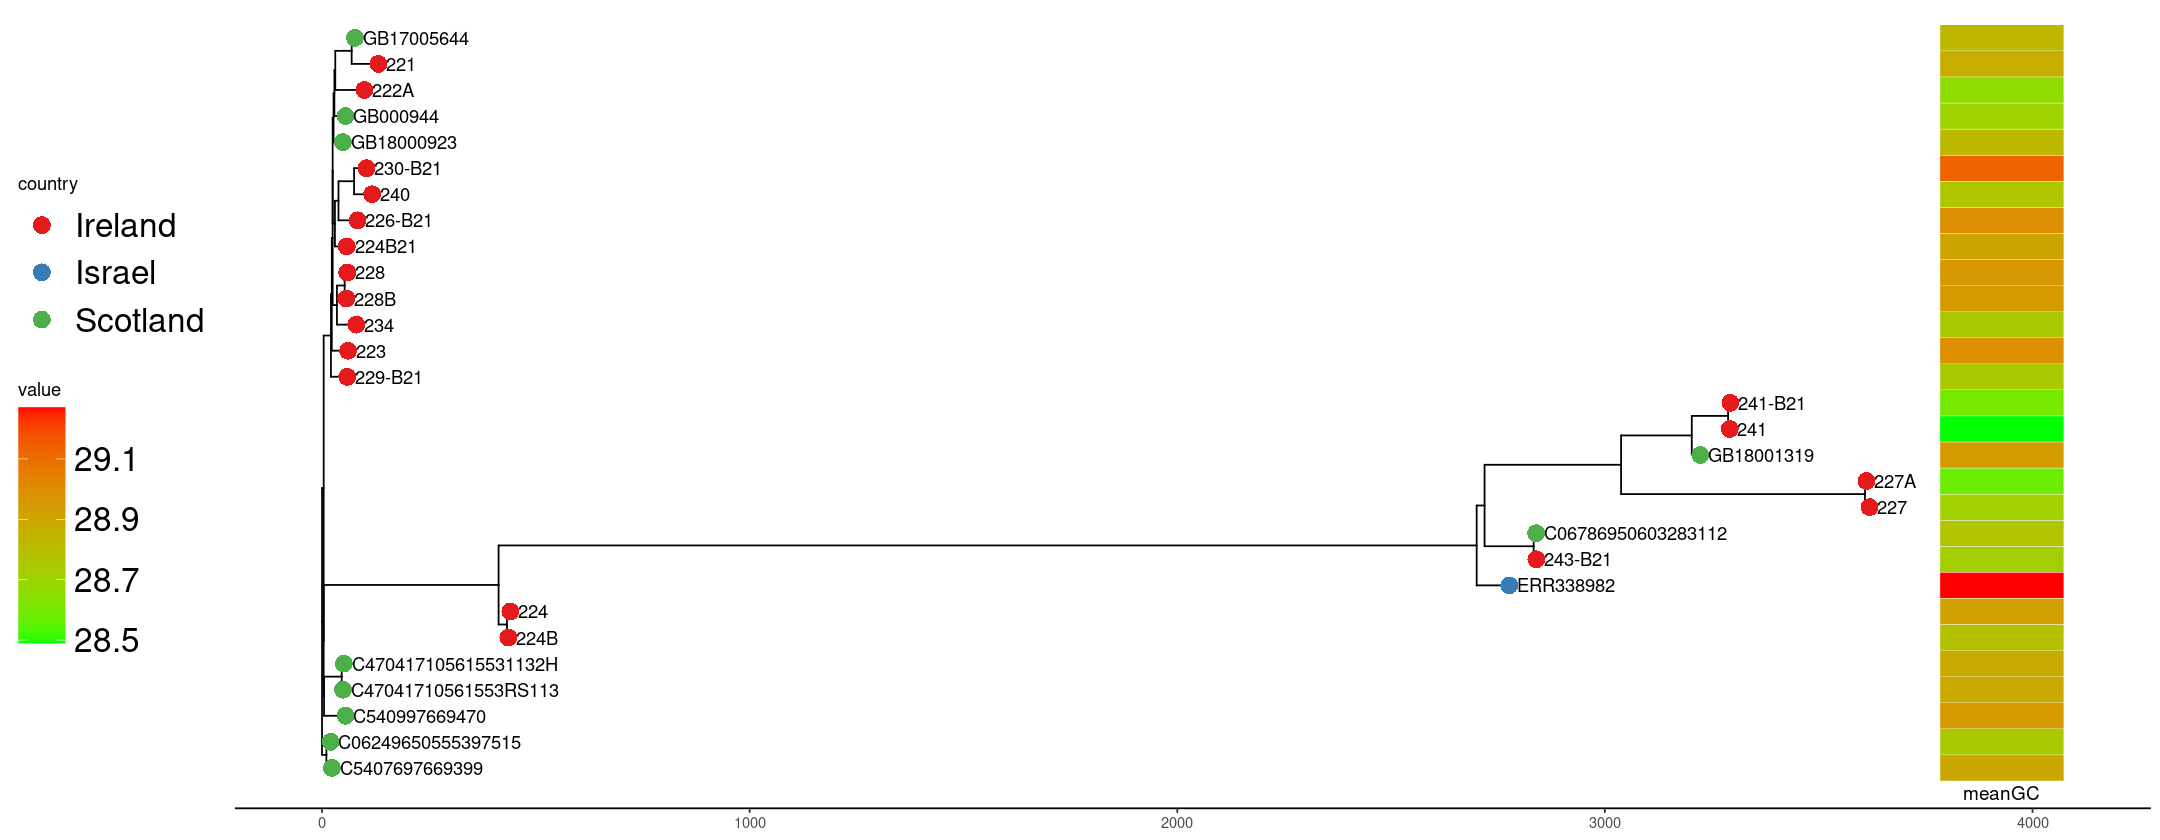

In [13]:
tips <- c('ref','PURE','pure','SRR20305624','SRR20305655','SRR20305659','SRR17119177','ERR338986')

stree <- drop.tip(tree, tips)
options(repr.plot.width=18, repr.plot.height=7) 
ggplottree(stree, meta, layout='rect', cols=c('country','meanGC'), cmaps=c('Set1','Blues'),tipsize=5, tiplabel=TRUE)